# Sample ROS Prov
###### Note: This file was made manually just to create a sample model of the provenance info for ROS. The same concepts can then be used to model actual ROS programs

In [1]:
# Importing the required libraries
from prov.model import ProvDocument
import prov
import datetime

# For visualizations
from prov.dot import prov_to_dot
from IPython.display import Image

In [2]:
# First we create a Provenance data file
ros = ProvDocument()

In [3]:
# We can write name spaces here
ros.set_default_namespace('https://docs.ros.org/en/dashing/Installation.html')
ros.add_namespace('node', 'https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html') # represents ros nodes
ros.add_namespace('topic', 'https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html') # represents ros topics
ros.add_namespace('msg', 'http://wiki.ros.org/msg') # represents ros topics
ros.add_namespace('activity', 'undefined') # represents the processes performed

# Some more for future use
ros.add_namespace('module', 'python programs or groups') # represents collection of ros enities, may be in the form of a program
ros.add_namespace('user', 'agent editing/contributing to the program') # represents code contributors
ros.add_namespace('enduser', 'end user who interacts with the program') # this represents the end user and his interaction with the code

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix msg <http://wiki.ros.org/msg>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
endDocument


## Creating the elements of Prov (Entities, Agents and Activities/Processes)

### First we generate Nodes

In [4]:
# First we generate the nodes as agents
ros.agent('node:talker',\
         {'node:time_initialized':datetime.datetime.now(),\
          'node:param_use_sim_time':'False'})
ros.agent('node:listener',\
         {'node:time_initialized':datetime.datetime.now(),\
          'node:param_use_sim_time':'False'})
# ros.agent('node:/_ros2cli_daemon_0')

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix msg <http://wiki.ros.org/msg>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker, [node:time_initialized="2021-06-24T18:42:59.888358" %% xsd:dateTime, node:param_use_sim_time="False"])
  agent(node:listener, [node:time_initialized="2021-06-24T18:42:59.888454" %% xsd:dateTime, node:param_use_sim_time="False"])
endDocument


In [5]:
# We then create the processes/activities related to each node and topic
# For instance, activity:node_Publish_to_topic or activity:node_Subscribe_to_topic

# Actvities related to node:talker
ros.activity('activity:talker_Publish_to_chatter', datetime.datetime.now())
ros.activity('activity:talker_Publish_to_parameter_events', datetime.datetime.now())
ros.activity('activity:talker_Publish_to_rosout', datetime.datetime.now())

# Actvities related to node:listener
ros.activity('activity:listener_Subscribe_to_chatter', datetime.datetime.now())
ros.activity('activity:listener_Publish_to_parameter_events', datetime.datetime.now())
ros.activity('activity:listener_Publish_to_rosout', datetime.datetime.now())

# We also have to define the set ROS param activity for the nodes
ros.activity('activity:talker_set_param')
ros.activity('activity:listener_set_param')

# Printing the prov so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix msg <http://wiki.ros.org/msg>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker, [node:time_initialized="2021-06-24T18:42:59.888358" %% xsd:dateTime, node:param_use_sim_time="False"])
  agent(node:listener, [node:time_initialized="2021-06-24T18:42:59.888454" %% xsd:dateTime, node:param_use_sim_time="False"])
  activity(activity:talker_Publish_to_chatter, 2021-06-24T18:42:59.894540, -)
  activity(activity:talker_Publish_to_parameter_events, 2021-06-24T18:42:59.894623, -)
  activity(activity:talker_Publish_to_rosout, 2021-06-24T18:42:59.894673, -)
  activity(activity

In [6]:
# We then create the entities that are being used

# We begin with describing the topics being used
# The essential parameters which we'd like to define are: name, type/msg_format and time of initialization
ros.entity('topic:chatter',\
           {'prov:label':'chatter',\
            'prov:type':'std_msgs/msg/String',\
            'prov:time_initialized':datetime.datetime.now()})
ros.entity('topic:parameter_events',\
           {'prov:label':'parameter_events',\
            'prov:type':'rcl_interfaces/msg/ParameterEvent',\
            'prov:time_initialized':datetime.datetime.now()})
ros.entity('topic:rosout',\
           {'prov:label':'rosout',\
            'prov:type':'rcl_interfaces/msg/Log',\
            'prov:time_initialized':datetime.datetime.now()})

# Then we describe the message being exchanged, we should note that the graphical view can become a bit clunky
# but we have to model messages as entities to ensure that we store the information, as for the point regarding
# readability, we can improve this later by query languages such as cypher which allow us to narrow down our
# vision to a specific portion of the visualized model by specifiying some constraints.

ros.entity('msg:message_1',\
           {'prov:topic':'/chatter',\
            'prov:type':'std_msgs/msg/String',\
            'prov:time_generated':datetime.datetime.now()})

# What if we declare an entity with the same name
# ros.entity('topic:chatter', {'prov:time_initialized':'00000253500000.00'})

# Printing the prov doc so far
print(ros.get_provn())

document
  default <https://docs.ros.org/en/dashing/Installation.html>
  prefix node <https://docs.ros.org/en/dashing/Tutorials/Understanding-ROS2-Nodes.html>
  prefix topic <https://docs.ros.org/en/dashing/Tutorials/Topics/Understanding-ROS2-Topics.html>
  prefix msg <http://wiki.ros.org/msg>
  prefix activity <undefined>
  prefix module <python programs or groups>
  prefix user <agent editing/contributing to the program>
  prefix enduser <end user who interacts with the program>
  
  agent(node:talker, [node:time_initialized="2021-06-24T18:42:59.888358" %% xsd:dateTime, node:param_use_sim_time="False"])
  agent(node:listener, [node:time_initialized="2021-06-24T18:42:59.888454" %% xsd:dateTime, node:param_use_sim_time="False"])
  activity(activity:talker_Publish_to_chatter, 2021-06-24T18:42:59.894540, -)
  activity(activity:talker_Publish_to_parameter_events, 2021-06-24T18:42:59.894623, -)
  activity(activity:talker_Publish_to_rosout, 2021-06-24T18:42:59.894673, -)
  activity(activity

### Drawing the Relations between 

In [7]:
# Finally we draw the relations between the nodes, topics, messages and activities

# First, we define the Generating Relations
# Node talker generated topic chatter and the other 2 nodes were generated by the cli
# ros.wasGeneratedBy('topic:chatter', 'node:talker')
# ros.wasGeneratedBy('topic:parameter_events', 'node:/_ros2cli_daemon_0')
# ros.wasGeneratedBy('topic:rosout', 'node:/_ros2cli_daemon_0')

# Next we define the relations for each topic/msg

# We begin with the topic Chatter
# Node "Talker" publishes to topic "Chatter"
ros.used('activity:talker_Publish_to_chatter', 'topic:chatter')
ros.used('node:talker','activity:talker_Publish_to_chatter')
# Node "Listener" listens to the chatter topic 
ros.used('activity:listener_Subscribe_to_chatter','node:listener')
ros.used('topic:chatter', 'activity:listener_Subscribe_to_chatter')


# We then give the same relations for the messages
# Node "Talker" publishes the message "message_1"
ros.used('activity:talker_Publish_to_chatter', 'msg:message_1')
# ros.used('node:talker','activity:talker_Publish_to_chatter') # This has been commented as it is already present
# Node "Listener" listens to the message "message_1"
# ros.used('activity:listener_Subscribe_to_chatter','node:listener') # Relation already present
ros.used('msg:message_1', 'activity:listener_Subscribe_to_chatter')

<ProvUsage: (msg:message_1, activity:listener_Subscribe_to_chatter)>

In [8]:
# Defining the hidden relations

# Publishing to parameter_events
# talker
ros.used('activity:talker_Publish_to_parameter_events', 'topic:parameter_events')
ros.used('node:talker','activity:talker_Publish_to_parameter_events')
# ros.used('node:/_ros2cli_daemon_0','activity:Publish_to_parameter_events')

# listener
ros.used('activity:listener_Publish_to_parameter_events', 'topic:parameter_events')
ros.used('node:listener','activity:listener_Publish_to_parameter_events')


# Publishing to rosout
# talker
ros.used('activity:talker_Publish_to_rosout', 'topic:rosout')
ros.used('node:talker','activity:talker_Publish_to_rosout')
# chatter
ros.used('activity:listener_Publish_to_rosout', 'topic:rosout')
ros.used('node:listener','activity:listener_Publish_to_rosout')

<ProvUsage: (node:listener, activity:listener_Publish_to_rosout)>

In [9]:
# We also have to define the set relations, which change the ROS param of the nodes
# Talker
ros.used('activity:talker_set_param', 'node:talker')
ros.used('node:talker','activity:talker_set_param')
# Listener
ros.used('activity:listener_set_param', 'node:listener')
ros.used('node:listener','activity:listener_set_param')

<ProvUsage: (node:listener, activity:listener_set_param)>

### Visualizing the Prov Model

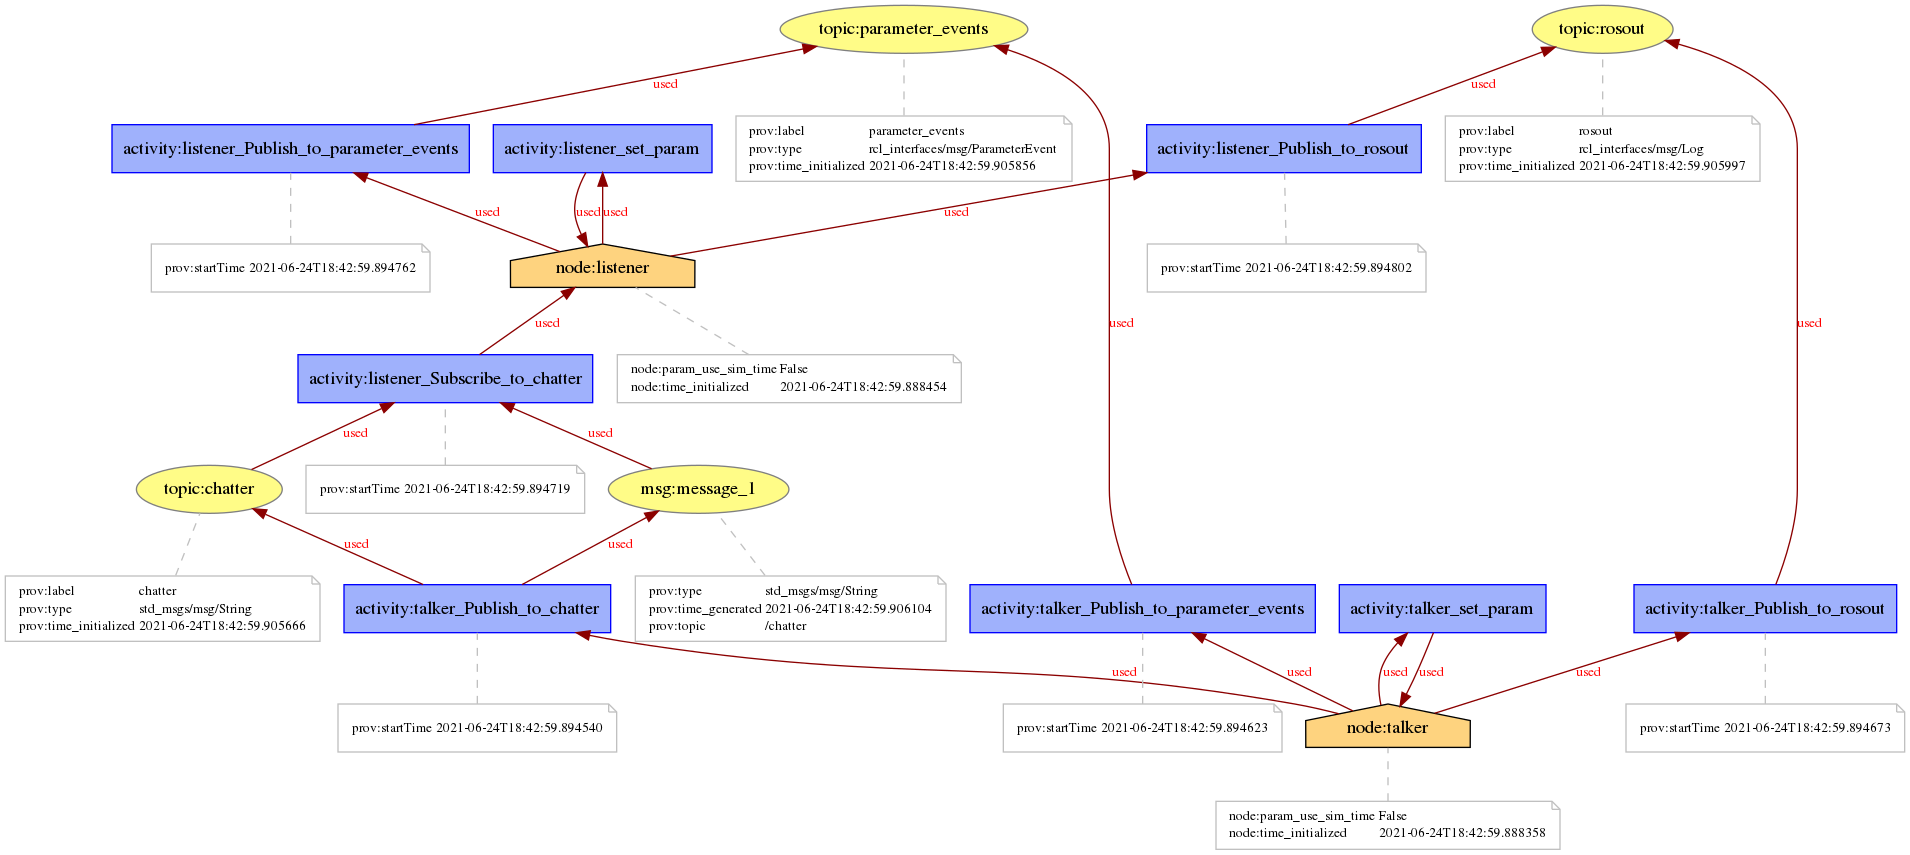

In [10]:
# visualize the graph
dot = prov_to_dot(ros)
dot.write_png('ros-prov.png')
Image('ros-prov.png')

## Seeing how it (the model) responds to different cases

In [11]:
### Inserting a topic with the same name
# ros.agent('node:/_ros2cli_daemon_0')

In [12]:
# visualize the graph
# dot = prov_to_dot(ros)
# dot.write_png('ros-prov.png')
# Image('ros-prov.png')